In [2]:
import pandas as pd

In [3]:
dataFrame = pd.read_excel("../data/bisiklet_fiyatlari.xlsx")

In [5]:
dataFrame.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


seaborn --> matplotlib üzerine kurulmuş görselleştirme kütüphanesi.

In [6]:
import seaborn as sbn 
import matplotlib.pyplot as plt

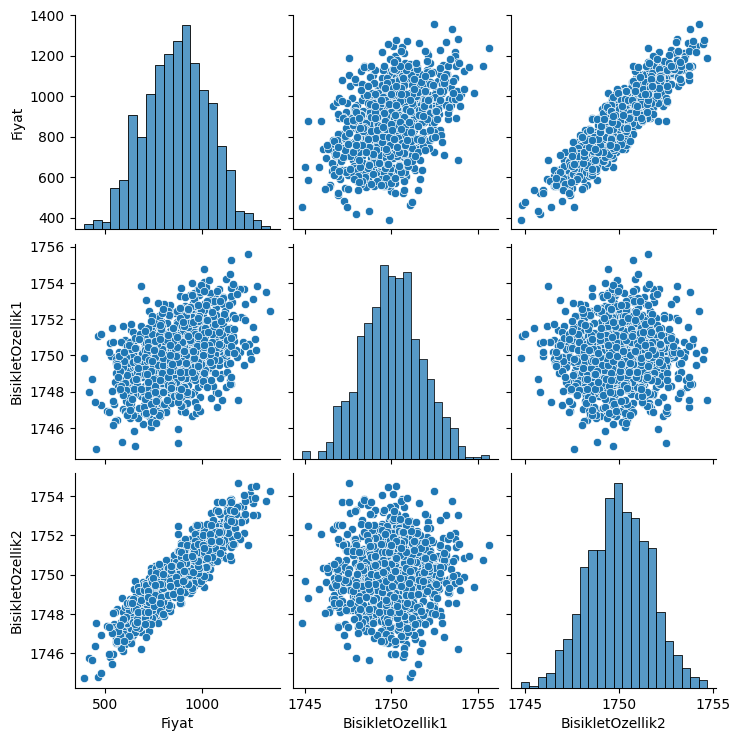

In [7]:
sbn.pairplot(dataFrame)

## Veriyi test/train olarak ikiye ayırmak

In [9]:
from sklearn.model_selection import train_test_split

### train_test_split

## y =  wx + b

## y --> label

## x --> feature

In [16]:
# .values ile pandas --> numpy olur.
y = dataFrame["Fiyat"].values
x = dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

### x_train --> x'in öğrenim için kullanılacak kısmı.

### x_test --> x'in test için kullanılacak kısmı.

### x.y --> Diziler girdi olarak giriliyor.

### test_size=0.33 --> Verinin % kaçı test için ayrılacağı giriliyor. Genelde 0.33 kullanılıyor ama yine de herhangi bir değer olabilir.

### random_state=15 --> İki kişi girdi olarak aynı sayıları yazdığı takdirde aynı algoritmaya göre seçilir.

In [18]:
x_train.shape

(670, 2)

In [20]:
x_test.shape # 330 ve 670 olarak bölünmesi test size ile alakalı.

(330, 2)

## Scaling 
---> Boyutunu değiştirmek büyültmek veya küçültmek.

Nöronlara verilecek veri küçültülür çünkü işlemler daha hızlı ve kolay olur.

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
scaler.fit(x_train)

MinMaxScaler()

In [24]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [26]:
x_train # --> Veriler kendine uygun halde 0 ile 1 arasına getirildi.

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

### Hazırlanan veriler için modele verme kısmı 

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [37]:
model = Sequential()

# Kaç tane hidden layers olduğu eklenir. kaç tane lazımsa o kadar satır eklenir.
model.add(Dense(4,activation="relu")) # --> 4 nöron.Farklı sayı da seçilebilir.
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

# Çıktı katmanı eklenir.
model.add(Dense(1))

# Yapıln işlemler birleştirlir hazır hale getirilir.
model.compile(optimizer = "rmsprop", loss = "mse")

In [38]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
21/21 [==============================] - 0s 1ms/step - loss: 795522.2500
Epoch 2/250
21/21 [==============================] - 0s 1ms/step - loss: 795296.4375
Epoch 3/250
21/21 [==============================] - 0s 991us/step - loss: 795087.0625
Epoch 4/250
21/21 [==============================] - 0s 2ms/step - loss: 794871.6875
Epoch 5/250
21/21 [==============================] - 0s 1ms/step - loss: 794643.5000
Epoch 6/250
21/21 [==============================] - 0s 1ms/step - loss: 794398.8750
Epoch 7/250
21/21 [==============================] - 0s 986us/step - loss: 794137.7500
Epoch 8/250
21/21 [==============================] - 0s 993us/step - loss: 793860.1875
Epoch 9/250
21/21 [==============================] - 0s 993us/step - loss: 793563.6875
Epoch 10/250
21/21 [==============================] - 0s 1ms/step - loss: 793249.4375
Epoch 11/250
21/21 [==============================] - 0s 1ms/step - loss: 792914.7500
Epoch 12/250
21/21 [==============================] - 0

In [43]:
loss = model.history.history["loss"]

<Axes: >

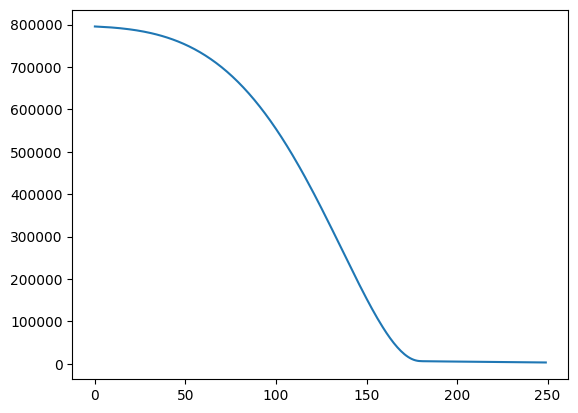

In [46]:
sbn.lineplot(x=range(len(loss)), y=loss)

In [51]:
trainLoss = model.evaluate(x_train,y_train, verbose=0)

In [52]:
testLoss = model.evaluate(x_train,y_train, verbose=0)

In [56]:
trainLoss 

2973.513671875

In [57]:
testLoss

2973.513671875

In [60]:
testTahminleri = model.predict(x_test) # x test  verilecek y test çıkacak.

11/11 [==============================] - 0s 573us/step


In [63]:
testTahminleri # Değişkenlere verilen özelliklere göre bisikletler bu fiyatlara satılabilir anlamına gelir.

array([[1021.3018 ],
       [ 718.43146],
       [ 890.2391 ],
       [ 873.68604],
       [ 872.4843 ],
       [ 556.243  ],
       [ 916.9161 ],
       [ 952.7111 ],
       [ 949.8437 ],
       [ 977.4011 ],
       [ 806.3287 ],
       [ 931.4459 ],
       [ 913.7836 ],
       [1009.95215],
       [1072.0813 ],
       [ 745.1469 ],
       [1032.6112 ],
       [ 702.8774 ],
       [1047.4951 ],
       [ 895.98535],
       [ 894.3491 ],
       [ 795.4073 ],
       [ 623.9147 ],
       [ 678.18805],
       [ 867.9874 ],
       [1040.6237 ],
       [ 766.7593 ],
       [ 794.7243 ],
       [ 867.7516 ],
       [ 805.6112 ],
       [ 583.04395],
       [ 832.2678 ],
       [ 780.35974],
       [ 715.76306],
       [ 884.98755],
       [ 857.6225 ],
       [ 997.16864],
       [ 965.7535 ],
       [ 869.924  ],
       [ 865.40906],
       [ 806.47174],
       [1071.8687 ],
       [1034.0603 ],
       [1031.2532 ],
       [ 906.7538 ],
       [ 696.05786],
       [1037.8617 ],
       [ 933.

In [64]:
tahminDF =  pd.DataFrame(y_test,columns=["Gerçek Y"])

In [65]:
tahminDF

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [69]:
testTahminleri = pd.Series(testTahminleri.reshape(330,))

In [70]:
testTahminleri

0      1021.301819
1       718.431458
2       890.239075
3       873.686035
4       872.484314
          ...     
325     983.256958
326     809.827820
327     819.292786
328    1089.616089
329     809.072144
Length: 330, dtype: float32

In [71]:
tahminDF = pd.concat([tahminDF])

In [72]:
tahminDF

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [73]:
tahminDF = pd.concat([tahminDF,testTahminleri],axis=1)

In [74]:
tahminDF

,Gerçek Y,0
0,1081.652164,1021.301819
1,622.675990,718.431458
2,889.356810,890.239075
3,902.826733,873.686035
4,897.662404,872.484314
...,...,...
325,1028.438035,983.256958
326,789.934950,809.827820
327,758.490486,819.292786
328,1172.871659,1089.616089


In [75]:
tahminDF.columns = ["Gerçek Y","Tahmin Y"]

In [76]:
tahminDF

,Gerçek Y,Tahmin Y
0,1081.652164,1021.301819
1,622.675990,718.431458
2,889.356810,890.239075
3,902.826733,873.686035
4,897.662404,872.484314
...,...,...
325,1028.438035,983.256958
326,789.934950,809.827820
327,758.490486,819.292786
328,1172.871659,1089.616089


<Axes: xlabel='Gerçek Y', ylabel='Tahmin Y'>

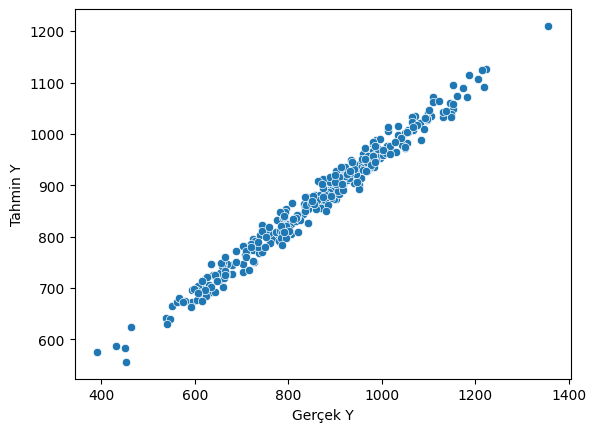

In [78]:
sbn.scatterplot(x = "Gerçek Y", y = "Tahmin Y", data=tahminDF)

### Sklearn ile hataların gerçek(absolute) değeri alınabilir ve bu alınan işlemlerle gerçek hata ne kata çıkar görülebilir. Sapma için mantık yürütülebilir.

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [85]:
mean_absolute_error(tahminDF["Gerçek Y"],tahminDF["Tahmin Y"]) # --> 42.80'lik hata.

42.800139083001895

In [86]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [93]:
yeniBisikletOzellikleri = [[1753,1751]] # Özellik verildi.

In [94]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri) # 0 ile 1 arasına atandı.

In [95]:
model.predict(yeniBisikletOzellikleri) # Modele tahmin yaptırıldı.

1/1 [==============================] - 0s 17ms/step


array([[1045.2683]], dtype=float32)

## Hazırlanan modelin kaydedilmesi

In [96]:
from tensorflow.keras.models import load_model

In [102]:
model.save("../model/bisiklet_modeli.keras") # Kaydetme.

In [103]:
sonradnCagirilanModel = load_model("../model/bisiklet_modeli.keras") # Çağırma.

In [104]:
model.predict(yeniBisikletOzellikleri) # Deneme.

1/1 [==============================] - 0s 15ms/step


array([[1045.2683]], dtype=float32)